## Sklearn을 이용한 차원 감소
(출처: https://bcho.tistory.com/1209?category=555440 [조대협의 블로그])

차원을 감소 시키는 피쳐 선택 (Feature Selection)과 피쳐 추출 (Feature extraction) 두 가지 방식이 있다

- 피쳐 선택: 여러개의 피쳐중에서 데이타의 특성을 가장 잘 나타내는 주요 필드 몇개만을 선택하여 대표 피쳐로 선택하는 방법

In [1]:
df=[ 7, 1, 2], [100, 1, 3], [ 92, 1, 5]
df

([7, 1, 2], [100, 1, 3], [92, 1, 5])

1,3번째 컬럼이 변화의 폭이 크기 때문에 데이터의 특성을 잘 반영하므로 1,3번째 컬럼 선택

In [2]:
df=[ 7, 2], [100, 3], [ 92, 5]
df

([7, 2], [100, 3], [92, 5])

- 피처 추출: 원본 데이타와 전혀 다른 형태의 데이타를 추출해내는 방법
- 예를 들어 [7, 1, 2]를 일정 공식에 대입해서 [3, 4]로 변환하여 특성을 표현하는 방법(PCA)

#### 차원축소의 목적
- 계산 비용 축소
- 노이즈 제거
- 도출된 결과의 이해

### 1. PCA
- 다음과 같은 데이터가 있다고 하자
![](https://t1.daumcdn.net/cfile/tistory/99BEE5335A09B08235)

PCA 분석에서는 데이타의 변화의 폭이 가장 큰 축을 정하고, 그 다음 그와 직교하는 축을 구한다

![](https://t1.daumcdn.net/cfile/tistory/996BFD335A09B08207)

그리고 데이타의 중심점에 축을 위치 시켜서 0,0을 중심으로 데이타가 양쪽으로 균등하게 퍼지도록 분포를 시켜서 축을 뒤틀어서 아래와 같이 원래의 데이타를 변화 시킨다.

![](https://t1.daumcdn.net/cfile/tistory/99EC41335A09B08220)

이렇게 하면 PCA는 데이터 중심축을 0,0으로 이동시키고 데이터의 변화 폭이 큰 순으로 X, Y축(2개의 주축)으로 정하여 데이터를 볼 수 있다.

또한 PCA 변환된 데이터의 주축 몇 개만(여기서는 1개)을 사용하여 2차원을 1차원으로 줄일 수 있다.

![](https://t1.daumcdn.net/cfile/tistory/99BCDD335A09B0821A)

물론 차원을 줄이면 원래 데이터가 가지고 있는 특징은 다소 사라지지만 전체적인 데이터 특성의 대세에는 컨 영향이 없기 때문에 장점이 더 많다.

#### Sklearn을 이용한 PCA 분석과 차원 감소
- IRIS 데이터를 사용해 3차원 데이터를 2차원으로 분석해보자.

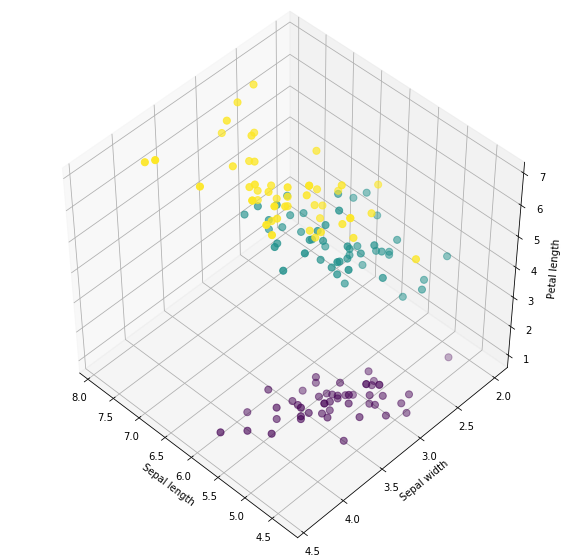

In [42]:
from sklearn import datasets
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import pandas as pd

iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data=pd.DataFrame(iris.data);

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.view_init(48, 134)
ax.scatter3D(iris.data[:,0],iris.data[:,1],iris.data[:,2], c=iris.target, s=50);
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()


PCA 분석을 통해서, 각 피쳐별 Variance를 분석하는 코드는 다음과 같다.

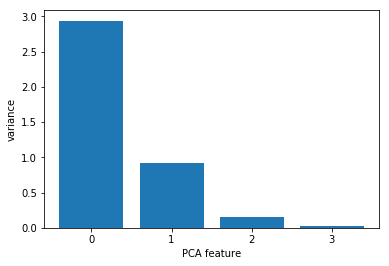

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(data)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


PCA 변환된 피쳐중 0,1번 피쳐만 사용해서 시각화를 해보면 다음과 같다


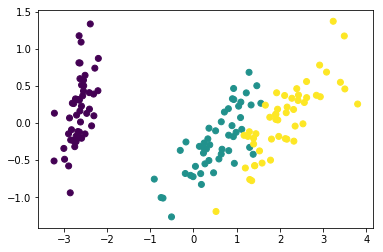

In [59]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = PCA(n_components=3)
pca_features = model.fit_transform(data)

xf = pca_features[:,0]
yf = pca_features[:,1]

plt.scatter(xf,yf,c=iris.target);
plt.show();


1차원으로 줄여서 시각화를 해보자.

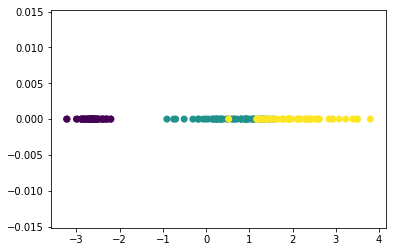

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = PCA(n_components=1)
pca_features = model.fit_transform(data)

xf = pca_features[:,0]
yf = len(xf)*[0]
plt.scatter(xf,yf,c=iris.target);
plt.show();


두개의 클래스 (녹색과 노랑색)이 다소 겹치는 부분이 있지만, 전체적으로 봤을때 1차원으로 변환해도 어느정도 분류 특성을 유지하고 있는 것을 볼 수 있다. 
